# Proyecto de Aprendizaje Automático – Clasificación de Delitos en CABA

Alumno: Albornoz Elias

Objetivo: Predecir si en un delito registrado en CABA se utilizó un arma (`uso_arma` = "SI"/"NO")

Fecha de descarga del dataset: 13/10/2025

Formato Original: Archivo Excel (.xlsx), descargado directamente desde el Portal de Datos Abiertos.

In [3]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Preparar Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Cargarmos el archivo desde el Drive

df = pd.read_excel("/content/drive/MyDrive/Aprendizaje - Automatico/proyecto_aprendizajeautomatico_2025/data/delitos_2022 .xlsx")

# Mostrar las primeras filas

df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2022,octubre,VIE,2022-10-14,3.0,Robo,Robo total,NO,NO,CHACARITA,15.0,-34584136.0,-58454704.0,1
1,2,2022,octubre,JUE,2022-10-27,5.0,Robo,Robo total,NO,NO,BARRACAS,4.0,-34645043.0,-58373194.0,1
2,3,2022,noviembre,MAR,2022-11-29,0.0,Robo,Robo total,NO,NO,CHACARITA,15.0,-34589982.0,-58446471.0,1
3,4,2022,noviembre,LUN,2022-11-28,0.0,Robo,Robo total,NO,NO,CHACARITA,15.0,-3458832.0,-58441232.0,1
4,5,2022,noviembre,MIE,2022-11-30,3.0,Robo,Robo total,NO,NO,RECOLETA,2.0,-34596748.0,-58413609.0,1


## EDA General

In [6]:
# Mostramos Informacion general

print("\n INFORMACIÓN GENERAL DEL DATASET ")
print(df.info())

# Contar valores nulos por columna
nulos = df.isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)

print("\n VALORES NULOS ")
if len(nulos) == 0:
    print("No hay valores nulos.")
else:
    print(nulos)



 INFORMACIÓN GENERAL DEL DATASET 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140918 entries, 0 to 140917
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id-mapa   140918 non-null  int64         
 1   anio      140918 non-null  int64         
 2   mes       140918 non-null  object        
 3   dia       140918 non-null  object        
 4   fecha     140918 non-null  datetime64[ns]
 5   franja    140871 non-null  float64       
 6   tipo      140918 non-null  object        
 7   subtipo   140918 non-null  object        
 8   uso_arma  140918 non-null  object        
 9   uso_moto  140918 non-null  object        
 10  barrio    138527 non-null  object        
 11  comuna    138525 non-null  float64       
 12  latitud   138533 non-null  float64       
 13  longitud  138533 non-null  float64       
 14  cantidad  140918 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object

In [7]:
# Mostramos los valores únicos en variables categóricas

categoricas = ['uso_arma', 'tipo', 'subtipo', 'uso_moto', 'dia', 'mes', 'barrio']

for col in categoricas:
    if col in df.columns:
        unicos = df[col].dropna().unique()
        print(f"\n• {col}: {unicos}")
    else:
        print(f"\n• {col}: [Columna no encontrada]")

print(f"• barrios únicos totales: {df['barrio'].nunique()}")


• uso_arma: ['NO' 'SI']

• tipo: ['Robo' 'Hurto' 'Vialidad' 'Homicidios' 'Lesiones' 'Amenazas']

• subtipo: ['Robo total' 'Hurto total' 'Robo automotor' 'Hurto automotor'
 'Lesiones por siniestros viales' 'Homicidios dolosos' 'Femicidios'
 'Lesiones Dolosas' 'Amenazas' 'Muertes por siniestros viales']

• uso_moto: ['NO' 'SI']

• dia: ['VIE' 'JUE' 'MAR' 'LUN' 'MIE' 'DOM' 'SAB']

• mes: ['octubre' 'noviembre' 'mayo' 'agosto' 'enero' 'septiembre' 'diciembre'
 'marzo' 'febrero' 'junio' 'abril' 'julio']

• barrio: ['CHACARITA' 'BARRACAS' 'RECOLETA' 'PARQUE AVELLANEDA' 'NUÃ‘EZ' 'ALMAGRO'
 'VILLA LURO' 'VILLA SOLDATI' 'VILLA REAL' 'SAN TELMO' 'MONTE CASTRO'
 'VILLA DEVOTO' 'VILLA GRAL. MITRE' 'VERSALLES' 'BOEDO' 'CABALLITO'
 'VILLA DEL PARQUE' 'PARQUE CHACABUCO' 'SAAVEDRA' 'VILLA PUEYRREDON'
 'FLORES' 'NUEVA POMPEYA' 'BOCA' 'VILLA URQUIZA' 'VILLA LUGANO'
 'VILLA RIACHUELO' 'AGRONOMIA' 'BELGRANO' 'COLEGIALES' 'PALERMO'
 'VILLA CRESPO' 'FLORESTA' 'VILLA ORTUZAR' 'CONSTITUCION' 'MONSERRAT'
 'BA

In [8]:
# Variables discretas: mostramos valores únicos
discretas = ['franja', 'comuna', 'cantidad']
for col in discretas:
    if col in df.columns:
        unicos = sorted(df[col].dropna().unique())
        print(f"\n• {col}: {unicos}")



• franja: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0)]

• comuna: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0)]

• cantidad: [np.int64(1)]


### Conclusión EDA General.

Características clave (columnas):

`uso_arma`: Variable objetivo. Categórica binaria ("SI" / "NO").

`tipo` / `subtipo`: Categorías generales y específicas del delito (ej.: "Robo", "Hurto", "Vialidad", "Homicidios", "Lesiones", "Amenazas").

`barrio`: Barrio de CABA donde ocurrió el delito (48 barrios únicos).

`comuna`: Número de comuna (1 a 15).

`franja`: Franja horaria del delito (0 a 23, donde 0 = medianoche–1 AM, ..., 23 = 11 PM–medianoche).

`día`: Día de la semana (ej.: "LUN", "MAR", ..., "DOM").

`mes`: Mes del año en texto (ej.: "enero", "febrero", etc.).

`uso_moto`: Indicador binario ("SI" / "NO") sobre el uso de motocicleta en el delito.

`latitud` / `longitud`: Coordenadas geográficas del lugar del hecho.

`anio`, `fecha`, `id-mapa`, `cantidad`: Metadatos del registro.

Tipos de datos:

Categóricos: `uso_arma`, `tipo`, `subtipo`, `barrio`, `día`, `mes`, `uso_moto`.

Numéricos: `franja`, `comuna`, `latitud`, `longitud`, `cantidad`.

`Fecha`: fecha.

Valores nulos encontrados:

`franja`: 47 registros

`barrio`: 2.391 registros

`comuna`: 2.393 registros

`latitud`: 2.385 registros

`longitud`: 2.385 registros

`uso_arma`: No hay nulos en la variable objetivo.

Al analizar los datos nulos, se observó que las ausencias en `barrio`, `comuna`, `latitud` y `longitud` coinciden en la gran mayoría de los casos, lo que sugiere que corresponden a registros donde no se pudo georreferenciar el delito. Dado que representan aproximadamente el 1,7% del total del dataset (2.391 / 140.919) y que la variable objetivo (`uso_arma`) no contiene valores nulos, se tomará la decisión de imputar o eliminar estos registros en la etapa de preprocesamiento.
Asimismo, los 47 valores nulos en `franja` serán imputados por la moda (valor más frecuente).
También se eliminará la columna (`cantidad`) ya que representa Numero de eventos registrados en esa ubicación y está conformado en su totalidad por el valor 1 y la columna (`anio`) ya que el dataset corresponde únicamente al año 2022.


## EDA Estadístico.

In [9]:
print(" ESTADÍSTICAS DESCRIPTIVAS (Variables numéricas) ")
numericas = df.select_dtypes(include=[np.number])
if not numericas.empty:
    print(numericas.describe())
else:
    print("No se encontraron variables numéricas.")

 ESTADÍSTICAS DESCRIPTIVAS (Variables numéricas) 
            id-mapa      anio         franja         comuna       latitud  \
count  1.409180e+05  140918.0  140871.000000  138525.000000  1.385330e+05   
mean   2.444619e+05    2022.0      12.704545       7.375643 -4.536734e+11   
std    3.634805e+05       0.0       6.527667       4.594290  9.641759e+13   
min    1.000000e+00    2022.0       0.000000       1.000000 -3.468106e+16   
25%    3.523025e+04    2022.0       8.000000       3.000000 -3.463706e+07   
50%    7.045950e+04    2022.0      13.000000       7.000000 -3.461027e+07   
75%    1.056888e+05    2022.0      18.000000      12.000000 -3.458574e+07   
max    1.114498e+06    2022.0      23.000000      15.000000 -3.457000e+01   

           longitud  cantidad  
count  1.385330e+05  140918.0  
mean  -1.110706e+12       1.0  
std    2.248358e+14       0.0  
min   -5.849483e+16       1.0  
25%   -5.847292e+07       1.0  
50%   -5.843017e+07       1.0  
75%   -5.838982e+07       1.0  


Se puede observar como en la columna (`franja`), el horario promedio de los delitos esta alrededor de las 12,7hs. Con una dispersión considerable de 6.53hs.
Con la mediana 50% podemos observar que la mayoría de delitos ocurren al entre la franja de 8 a 18 horas.

Se puede observar como la comuna en promedio donde ocurren los delitos es aproximadamente la numero 7. Con una dispersión de 4.59 en las comunas.


In [11]:
# Variables categoricas

categoricas = ['tipo', 'subtipo', 'barrio', 'dia', 'mes', 'uso_moto']

for col in categoricas:
    if col in df.columns:
        print(f"\n {col.upper()} ")
        print(f"• Valores únicos: {df[col].nunique()}")
        if df[col].nunique() <= 10:
            print(df[col].value_counts())
        else:
            print("• Top 10 valores más frecuentes:")
            print(df[col].value_counts().head(10))


 TIPO 
• Valores únicos: 6
tipo
Robo          56334
Hurto         54304
Vialidad      10181
Lesiones      10153
Amenazas       9857
Homicidios       89
Name: count, dtype: int64

 SUBTIPO 
• Valores únicos: 10
subtipo
Robo total                        55581
Hurto total                       50255
Lesiones Dolosas                  10153
Lesiones por siniestros viales    10070
Amenazas                           9857
Hurto automotor                    4049
Robo automotor                      753
Muertes por siniestros viales       111
Homicidios dolosos                   84
Femicidios                            5
Name: count, dtype: int64

 BARRIO 
• Valores únicos: 48
• Top 10 valores más frecuentes:
barrio
PALERMO         11885
BALVANERA        9426
FLORES           7842
RECOLETA         6327
CABALLITO        6032
VILLA LUGANO     5682
ALMAGRO          5239
SAN NICOLAS      5058
BARRACAS         4590
CONSTITUCION     4555
Name: count, dtype: int64

 DIA 
• Valores únicos: 7
dia
VIE    

Realizamos un Análisis de las Variables Categóricas en el cual observamos que:

`Tipo`:
Predominan los robos (56.334) y hurtos (54.304), que juntos representan el 78,5% de los registros. Los delitos viales (Vialidad, Lesiones por siniestros viales) y las Amenazas son también frecuentes, mientras que los Homicidios son muy raros (solo 89 casos).

`Subtipo`:
La mayoría son "Robo total" y "Hurto total", lo que confirma que el foco del dataset está en delitos contra la propiedad. Los subtipos más graves (como Homicidios dolosos o Femicidios) tienen muy pocos registros.

`Barrios`:
Los barrios con más delitos son Palermo (11.885), Balvanera (9.426) y Flores (7.842). Esto quiere decir que la distribución de delitos no es uniforme en toda la ciudad.

`Día`:
Los viernes son el día con más delitos (21.374), seguido de martes y jueves. Los domingos son los menos activos (17.033). La distribución de delitos por día de la semana es relativamente uniforme, con una ligera disminución los fines de semana, especialmente los domingos.

`Mes`:
La distribución de delitos por mes es también relativamente uniforme.
Los meses con más delitos son diciembre, octubre y noviembre.

`uso_moto`: La gran mayoría de los delitos no involucraron el uso de una motocicleta, mientras que un pequeño porcentaje ("SI") sí lo hicieron. Similar a la variable objetivo uso_arma, esta variable también está desbalanceada.


 VARIABLE OBJETIVO: uso_arma 
uso_arma
NO    132252
SI      8666
Name: count, dtype: int64


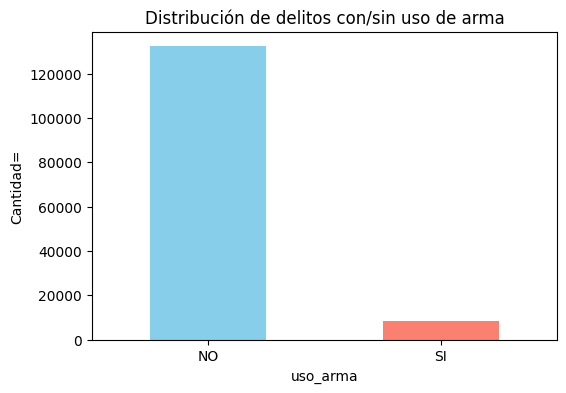

In [19]:
print(" VARIABLE OBJETIVO: uso_arma ")
print(df['uso_arma'].value_counts(dropna=False))

# Gráfico de barras
plt.figure(figsize=(6, 4))
df['uso_arma'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de delitos con/sin uso de arma')
plt.xlabel('uso_arma')
plt.ylabel('Cantidad=')
plt.xticks(rotation=0)
plt.show()

Punto importante a tener en cuenta a la hora de realizar el modelo.

La variable `uso_arma` esta desbalanceada, ya que cuenta con:

132.252 delitos (93,8%) ocurrieron sin uso de arma (NO).

8.666 delitos (6,2%) ocurrieron con uso de arma (SI).

Esto puede sesgar el modelo.

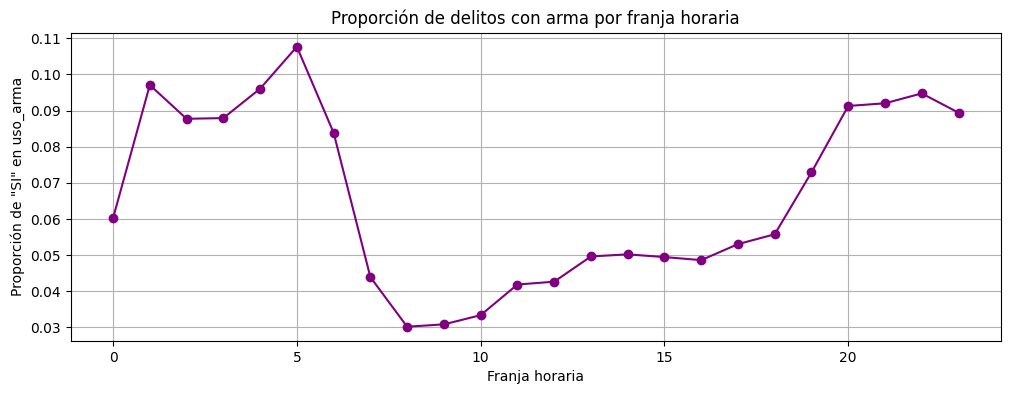

In [12]:
#Proporción de uso de arma por franja

uso_arma_por_franja = df.groupby('franja')['uso_arma'].apply(lambda x: (x == 'SI').mean())
plt.figure(figsize=(12, 4))
uso_arma_por_franja.plot(kind='line', marker='o', color='purple')
plt.title('Proporción de delitos con arma por franja horaria')
plt.xlabel('Franja horaria')
plt.ylabel('Proporción de "SI" en uso_arma')
plt.grid(True)
plt.show()

Se puede observar de forma gráfica como la proporción de uso de arma tiende a ser más alta en las franjas horarias aproximadas entre 1 a 6 AM y nuevamente en las franjas de 19 a 23pm. Durante la franja horaria de las 8 a 10 AM el uso de armas parece ser menor.

Esto indica que la probabilidad de que se use arma no es constante a lo largo del día. Esto nos indica que la variable (franja) no sigue una distribución lineal.


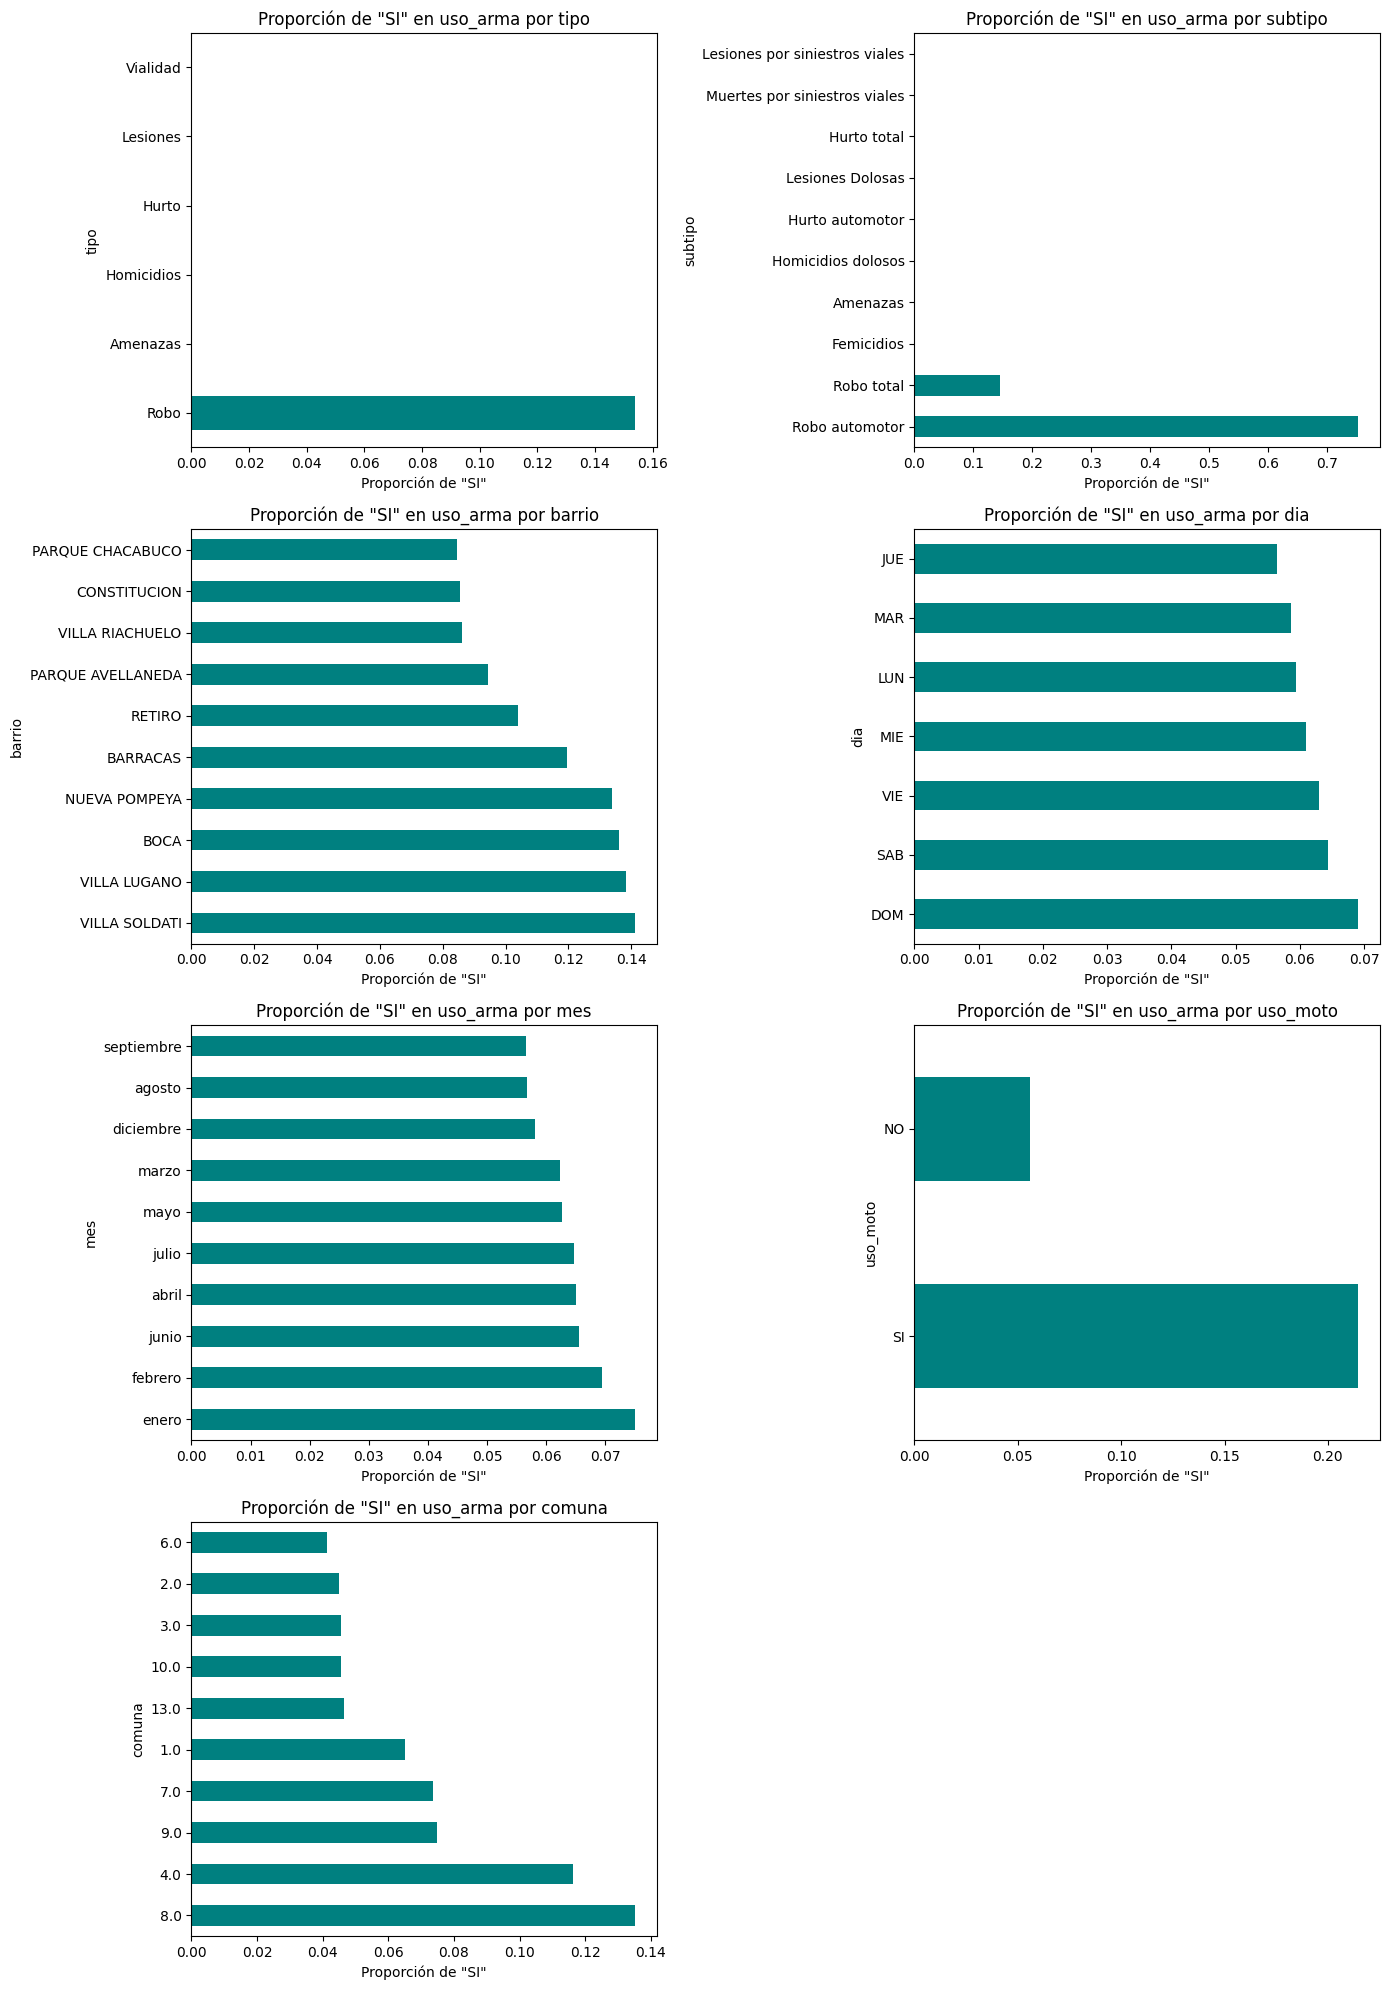

In [22]:
# Lista de variables categóricas a analizar.

categoricas = ['tipo', 'subtipo', 'barrio', 'dia', 'mes', 'uso_moto', 'comuna']

# Filtrar solo las que están en el DataFrame

categoricas = [col for col in categoricas if col in df.columns]

# Configurar la cuadrícula de subgráficos (ajustar filas/columnas según cantidad)

n_vars = len(categoricas)
n_cols = 2
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten() if n_vars > 1 else [axes]

for i, col in enumerate(categoricas):
    # Calcular proporción de "SI" en uso_arma por categoría

    prop = df.groupby(col)['uso_arma'].apply(lambda x: (x == 'SI').mean()).sort_values(ascending=False)

    # Si hay muchas categorías (>10), mostrar solo top 10

    if len(prop) > 10:
        prop = prop.head(10)

    # Graficar

    prop.plot(kind='barh', ax=axes[i], color='teal')
    axes[i].set_title(f'Proporción de "SI" en uso_arma por {col}')
    axes[i].set_xlabel('Proporción de "SI"')
    axes[i].set_ylabel(col)

# Ocultar ejes vacíos si hay más subgráficos que variables

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Conclusión EDA Estadístico

Al analizar conjuntamente los gráficos de distribución de la variable objetivo (`uso_arma`), la proporción de uso de arma por `franja horaria`, y la proporción de uso de arma por otras variables categóricas clave, obtenemos una visión integral de los factores que influyen en la probabilidad de que un delito involucre un arma:

**Distribución de la Variable Objetivo (`uso_arma`):**

El primer gráfico (distribución de `uso_arma`) muestra un fuerte desbalance de clases. La gran mayoría de los delitos (aproximadamente 93.8%) ocurren sin uso de arma ("NO"), mientras que un pequeño porcentaje (aproximadamente 6.2%) involucra un arma ("SI").

**Implicación para el modelo:** Este desbalance es crítico. Cualquier modelo predictivo deberá ser entrenado y evaluado teniendo en cuenta este desbalance para evitar que simplemente prediga la clase mayoritaria ("NO") la mayoría de las veces. Se necesitarán técnicas de manejo de desbalance (comode métricas de evaluación adecuadas, precisión, recall, F1-score).

**Proporción de Uso de Arma por `Franja Horaria`:**

El gráfico de línea muestra que la probabilidad de uso de arma no es constante a lo largo del día. Hay picos de mayor proporción de uso de arma en las horas de la madrugada (aproximadamente 1 AM a 6 AM) y en las últimas horas de la tarde/noche (aproximadamente 19 PM a 23 PM).

**Implicación para el modelo:** La `franja horaria` es un predictor importante y útil. A pesar de no ser una relación lineal, la variación a lo largo del día permite al modelo aprender patrones que aumentan o disminuyen la probabilidad de uso de arma en diferentes momentos.

**Proporción de Uso de Arma por Otras Variables Categóricas (`tipo`, `uso_moto`, `comuna`, `barrio`, `dia`, `mes`):**

El gráfico resumen confirma visualmente las relaciones más fuertes:

**`Tipo`:** La barra de "Robo" es la única que muestra una proporción significativa de uso de arma ("SI"). Esto reitera que si el delito no es un robo, es muy poco probable que se haya usado un arma. Esta es una característica extremadamente predictiva.

**`uso_moto`:** Los delitos con uso de moto tienen una proporción de uso de arma notablemente mayor que aquellos sin moto. Esta es otra característica clave.

**`Comuna` y `Barrio`:** Las comunas 8 y 4 muestran las mayores proporciones de uso de arma, y ciertos barrios también destacan. Esto indica que la ubicación geográfica a nivel de comuna/barrio es un factor influyente.

**`Día` y `Mes`:** Mientras que muestran algunas variaciones, la influencia del día de la semana o el mes parece menos pronunciada que la de `tipo`, `uso_moto` o `franja`. Aún así, podrían aportar valor predictivo.

**Conclusión General del Análisis.**

La variable objetivo `uso_arma` está significativamente desbalanceada. Los predictores más fuertes identificados visualmente son el **`tipo`(específicamente "Robo")**, el **`uso_moto`**, la **`franja horaria`** y la **ubicación geográfica (`comuna`/`barrio`)**. Estas variables muestran relaciones claras, aunque no siempre lineales, con la probabilidad de uso de arma. Variables como `dia` y `mes` tienen una influencia menor pero aún podrían ser útiles.

Con este análisis gráfico confirmo qué características serán las más importantes para alimentar un modelo de clasificación y destaco la necesidad de abordar el desbalance de clases durante las etapas de preprocesamiento y modelado.


# Posible Modelo

**Consideración del Modelo: Árbol de Decisión**

Basándonos en los hallazgos de este análisis exploratorio, un modelo de **Árbol de Decisión** es la opción posible para la tarea de clasificación de `uso_arma`. Las razones principales son:

**Manejo de Variables Categóricas Clave:** Variables como `tipo` y `uso_moto` presentan divisiones muy claras y predictivas ("Robo" / otros `tipo`, "SI" / "NO" en `uso_moto`). Los árboles de decisión son buenos para crear reglas de decisión basadas en estas divisiones categóricas.

**Relaciones No Lineales:** La variabilidad observada en la proporción de uso de arma con respecto a la `franja horaria` y la `comuna` sugiere relaciones no lineales. Los árboles de decisión pueden modelar estas interacciones complejas dividiendo el espacio secuencialmente.

*   **Identificación de Interacciones:** Un árbol de decisión puede identificar combinaciones de características que son particularmente predictivas (por ejemplo, "Robo" + "uso_moto" + "franja horaria nocturna").

*   **Interpretabilidad:** La estructura de árbol permite entender el camino de decisión que lleva a una predicción, lo cual es valioso para comprender los factores que más influyen en el uso de arma.

Si bien otros modelos podrían ser probados, las características del dataset y las relaciones identificadas en el EDA sugieren que un Árbol de Decisión está bien alineado con la naturaleza del problema de predicción planteado.

# Preprocesamiento

Lista a realizar

1- Imputar valores nulos `franja` con la moda, 47 registros

2- Eliminar columna `latitud`, `longitud`, `cantidad`, `anio`, `id-mapa` y `fecha`

3- Imputar nulos `barrio`, `comuna`, 2.390 filas aproximadamente

4- Convertir variables categoricas a numericas con One-Hot Encoding `usp_moto`, `uso_arma`, `dia`, `mes`, `tipo`

Para barrio si uso One-Hot crea 48 columnas y ypuede sobreajustar, tal vez usar OrdinalEncoder.

5- verificar que todo este bien, tipo de datos, columnas.

6- Dividir el dataset en entrenamiento y prueba, probar 70/30 en adelante.